# Least Squares for Data Science

##### By Yoni Nazarathy.

###### Created using Julia 1.1

In [1]:
using LinearAlgebra, Statistics, Plots, Random, Distributions
pyplot();
Random.seed!(0);

In [2]:
n = 10;
m = 3
A = rand(1:5,n,m)

10×3 Array{Int64,2}:
 1  3  4
 3  5  1
 2  2  1
 1  3  3
 3  3  5
 1  2  5
 4  1  3
 1  5  4
 4  4  4
 4  5  3

In [3]:
b = rand(100:20:200,n)

10-element Array{Int64,1}:
 200
 160
 140
 180
 180
 120
 120
 200
 120
 140

We'll need to be very lucky to have an exact solution, $x$, for
$$
A x = b.
$$

It would mean that $b$ is in the collumn space (range) of $A$.

In [4]:
bt = 0.3A[:,1] - 5A[:,2] + 4A[:,3]

10-element Array{Float64,1}:
   1.3000000000000007
 -20.1               
  -5.4               
  -2.6999999999999993
   5.9               
  10.3               
   8.2               
  -8.7               
  -2.8000000000000007
 -11.8               

In [5]:
x = inv(A[1:3,:])*bt[1:3]

3-element Array{Float64,1}:
  0.3000000000000016
 -5.000000000000003 
  4.000000000000001 

In [6]:
A*x - bt

10-element Array{Float64,1}:
 -3.552713678800501e-15 
 -7.105427357601002e-15 
 -8.881784197001252e-16 
 -3.552713678800501e-15 
  1.7763568394002505e-15
  0.0                   
  7.105427357601002e-15 
 -1.0658141036401503e-14
  0.0                   
 -3.552713678800501e-15 

However in general we are typically not so lucky...

In [7]:
x = inv(A[1:3,:])*b[1:3]
A*x - b

10-element Array{Float64,1}:
  -5.684341886080802e-14 
  -1.4210854715202004e-13
  -5.684341886080802e-14 
 -25.000000000000057     
 187.49999999999994      
 138.75                  
 246.25                  
 -27.500000000000114     
 249.9999999999999       
 171.2499999999999       

So instead we try to minimize $||Ax - b||$ or similarly $||Ax - b||^2$.

In one line this is how we get the least squares minimizer:

In [8]:
xHat = A\b

3-element Array{Float64,1}:
 -0.7213250090294512
 25.268046024456932 
 20.087714772199572 

In [9]:
A*xHat - b

10-element Array{Float64,1}:
 -44.56632784686036 
 -15.736030132604128
 -70.81884319694547 
 -44.654042619059965
  -5.921263092719698
  30.25334090088228 
 -37.354109695062164
   5.969764202053511
  58.53774315050822 
  43.71807440276558 

In [10]:
bestLoss = norm(A*xHat - b)

130.23940757974952

Let's try values "around it" to get convinced about its optimallity...

In [11]:
loss(x) = norm(A*x - b)

R1(θ) = [cos(θ) -sin(θ) 0; 
         sin(θ) cos(θ) 0 ;
           0      0    1 ]

R2(θ) = [cos(θ)  0 -sin(θ);  
           0      0    1 ;
        sin(θ)  0 cos(θ) ]


pts = []

N = 10000

for _ in 1:N
    θ1,θ2 = rand(Uniform(0,2π),2)
    r = 20*randexp()
    xt = xHat + R1(θ1)*R2(θ2)*[r,0,0]
    push!(pts,[xt ; loss(xt)])
    if loss(xt) < loss(xHat)
        println("Found something better")
    end
end
losses = last.(pts)
println("Minimum explored loss: ", minimum(losses) ,"\tvs. optimum loss: ", bestLoss )

Minimum explored loss: 130.23941151184172	vs. optimum loss: 130.23940757974952


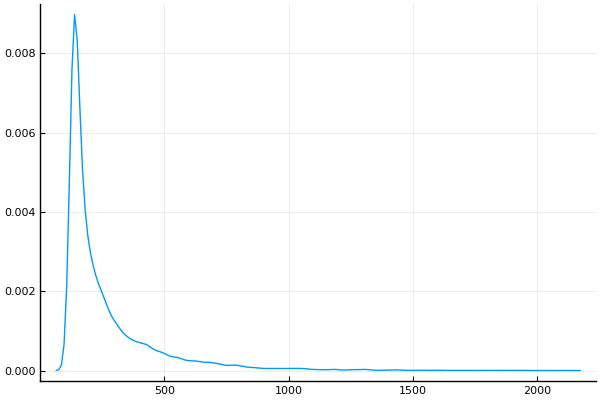

In [12]:
using StatsPlots
density(losses,legend=false)

We can even make a little movie to try and visualize such a minimum point...

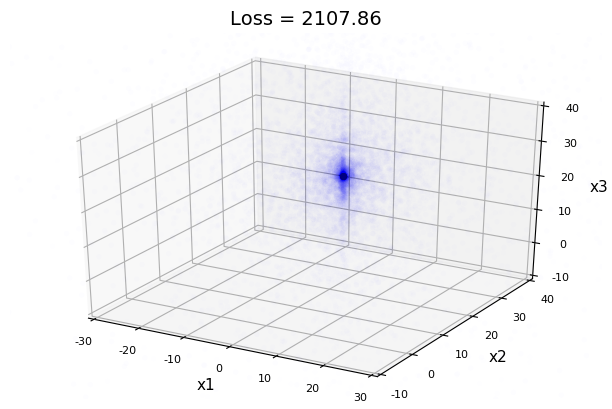

┌ Info: Saved animation to 
│   fn = /Users/yoninazarathy/Dropbox/MATH7502/LeastSquaresVideo/bestValue.gif
└ @ Plots /Users/yoninazarathy/.julia/packages/Plots/Ih71u/src/animation.jl:95


Plots.AnimatedGif("/Users/yoninazarathy/Dropbox/MATH7502/LeastSquaresVideo/bestValue.gif")

In [13]:
ani = Animation()
for α in 0.01:0.01:1.0
    lossQ = quantile(losses,α)
    pltPnts = filter(x->x[4] < lossQ,pts)
    scatter([xHat[1]],[xHat[2]],[xHat[3]],c=:red,ms=5.0,markerstrokewidth=0)
    scatter!(first.(pltPnts),(x->x[2]).(pltPnts),(x->x[3]).(pltPnts),
        c=:blue,markeralpha=0.01,markerstrokewidth=0,xlabel="x1",ylabel="x2",zlabel="x3",legend=false,
        xlim=(-30,30),ylim=(-10,40),zlim=(-10,40),title="Loss = $(round(lossQ,digits=2))")
    frame(ani)
end
gif(ani,"bestValue.gif",fps=10)

## Getting there via gradient descent

$$
L(x) =||Ax-b||^2 = (Ax-b)^T(Ax-b)
$$

$$
\nabla L(x) = 2A^T(Ax-b).
$$

In [14]:
traj = []
x = ones(3)
xprev = -x
η = 0.0001
while norm(x-xprev) > 10^-3
    xprev = x
    x = x - η*2A'*(A*x-b)
    push!(traj,x)
end

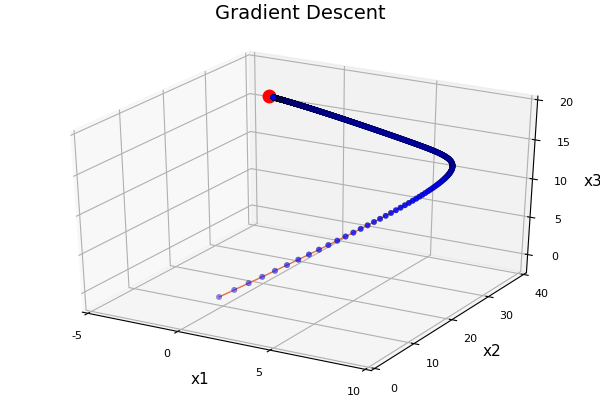

In [15]:
scatter(first.(traj),(x->x[2]).(traj),(x->x[3]).(traj),
        c=:blue,markeralpha=1,markerstrokewidth=0.2,xlabel="x1",ylabel="x2",zlabel="x3",legend=false,
        xlim=(-5,10),ylim=(0,40),zlim=(-2,20),title="Gradient Descent")
plot!(first.(traj),(x->x[2]).(traj),(x->x[3]).(traj))
scatter!([xHat[1]],[xHat[2]],[xHat[3]],c=:red,ms=10.0,markerstrokewidth=0)

## The Normal Equations and $A^\dagger$

$$
\nabla L(x) = 2A^T(Ax-b) = 0
$$

$$
2A^TAx = 2A^Tb
$$

$$
x = (A^TA)^{-1}A^T b = A^\dagger b
$$

In [16]:
xHat

3-element Array{Float64,1}:
 -0.7213250090294512
 25.268046024456932 
 20.087714772199572 

In [17]:
pinv(A)

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

In [18]:
inv(A'*A)*A'

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

In [19]:
pinv(A)*b

3-element Array{Float64,1}:
 -0.7213250090294663
 25.26804602445693  
 20.087714772199597 

In [20]:
A'A \ A'b

3-element Array{Float64,1}:
 -0.7213250090294668
 25.268046024456947 
 20.087714772199575 

## Using Factorizations for $A^\dagger$

### The QR factorization: $A= QR$

$$
A^\dagger = (A^TA)^{-1}A^T = (R^TQ^TQR)^{-1} R^T Q^T = (R^TR)^{-1}R^T Q^T = R^{-1}Q^T
$$

So a least squares approximate solution can be obtained via $\hat{x} = R^{-1}Q^T b$

In [21]:
F = qr(A);
Q, R = F.Q, F.R
R

3×3 Array{Float64,2}:
 -8.60233  -9.41606  -8.83482
  0.0      -6.19176  -3.84557
  0.0       0.0       5.84445

In [22]:
Q'*Q

10×10 Array{Float64,2}:
  1.0           1.38778e-16  -6.93889e-17  …  1.66533e-16   1.11022e-16
  1.38778e-16   1.0          -1.63064e-16     5.89806e-17  -5.55112e-17
 -6.93889e-17  -1.63064e-16   1.0             2.77556e-17   8.32667e-17
  1.12323e-16  -1.95156e-18  -9.84456e-17     3.79471e-17   1.30104e-17
  2.63678e-16   7.80626e-17  -1.249e-16       7.28584e-17   1.38778e-17
  1.50921e-16   9.45424e-17  -2.48933e-16  …  5.20417e-18  -4.51028e-17
  2.35922e-16   2.498e-16     1.11022e-16     2.08167e-17   2.77556e-17
  1.52656e-16  -9.1073e-17   -1.79544e-16     5.55112e-17  -2.42861e-17
  1.66533e-16   5.89806e-17   2.77556e-17     1.0           2.77556e-17
  1.11022e-16  -5.55112e-17   8.32667e-17     2.77556e-17   1.0        

In [23]:
inv(R)*Q'*b

3-element Array{Float64,1}:
 -0.7213250090294547
 25.268046024456922 
 20.087714772199593 

### The SVD factorization: $A= U \Sigma V^T$

$$
A^\dagger = (A^TA)^{-1}A^T = (V \Sigma U^T U \Sigma V^T)^{-1} V \Sigma U^T = (V \Sigma^2 V^T)^{-1} V \Sigma U^T
=V^{-T} \Sigma^{-2} V^{-T} V \Sigma U^T = V \Sigma^{-1} U^T
$$

So a least squares approximate solution can be obtained via $\hat{x} = V \Sigma^{-1} U^T$

In [24]:
F = svd(A)
U, S, V = F.U , F.S, F.V;
S

3-element Array{Float64,1}:
 17.05423938497788 
  4.693241515159658
  3.889267679171903

In [25]:
sqrt.(eigvals(A'*A))

3-element Array{Float64,1}:
  3.8892676791719025
  4.6932415151596585
 17.05423938497788  

In [26]:
eigvals(A*A')

10-element Array{Float64,1}:
  -9.30326999185546e-15  
  -4.248162038514072e-15 
  -1.33054744510433e-15  
  -6.937870285002419e-16 
   3.6308982445650267e-16
   4.900403029047245e-15 
   6.366773908623675e-14 
  15.126403080251208     
  22.02651591961812      
 290.84708100013074      

In [27]:
sqrt.(filter(x->x>0,eigvals(A'*A)))

3-element Array{Float64,1}:
  3.8892676791719025
  4.6932415151596585
 17.05423938497788  

In [28]:
A*V[:,1] - S[1]*U[:,1]

10-element Array{Float64,1}:
 7.993605777301127e-15 
 1.7763568394002505e-15
 8.881784197001252e-16 
 8.881784197001252e-16 
 2.6645352591003757e-15
 8.881784197001252e-16 
 2.6645352591003757e-15
 8.881784197001252e-16 
 1.7763568394002505e-15
 8.881784197001252e-16 

In [29]:
pinv(A)

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

In [30]:
V*Diagonal(1 ./ S)*U'

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

## What if $(A^T A)$ is singular? SVD to the rescue...

In [31]:
s = 0
while true
    Random.seed!(s)
    A = rand([1,2],n,m)
    r = rank(A)
    if rank(A) < 3
        println("Found rank rank $(r) matrix with seed s=$s")
        break
    end
    s += 1
end

Found rank rank 2 matrix with seed s=204


In [32]:
Random.seed!(204);
A = rand([1.0,2.0],n,m)

10×3 Array{Float64,2}:
 2.0  1.0  2.0
 1.0  2.0  1.0
 1.0  1.0  1.0
 1.0  2.0  1.0
 1.0  1.0  1.0
 2.0  2.0  2.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 2.0  2.0  2.0
 1.0  2.0  1.0

In [33]:
rank(A)

2

In [34]:
rank(A'*A),det(A'*A)

(2, 0.0)

In [35]:
inv(A'*A)

SingularException: SingularException(3)

So it appears that finding a least squares approximate solution to $Ax = b$ isn't doable...???

In [36]:
A \ b

3-element Array{Float64,1}:
 29.333333333333293
 44.266666666666694
 29.333333333333307

In [37]:
aDag = pinv(A)

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1 
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1 

In [38]:
aDag*b

3-element Array{Float64,1}:
 29.333333333333346
 44.266666666666644
 29.333333333333343

In [39]:
F = svd(A)
U, S, V = F.U , F.S, F.V;
S

3-element Array{Float64,1}:
 7.779559352679487    
 1.5743113663240509   
 4.741575244451873e-16

In [40]:
S = filter(x->x>10^-6,S)

2-element Array{Float64,1}:
 7.779559352679487 
 1.5743113663240509

In [41]:
r = length(S)

2

In [42]:
V[:,1:r]*Diagonal(1 ./ S)*U[:,1:r]'

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1 
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1 

In [43]:
pinv(A)

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1 
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1 

## What is going on? Back to the normal equations...

$$
A^T A x = A^T b
$$

And using $x = V \Sigma^{-1} U^T$

In [44]:
A'*A*(pinv(A)*b) - A'*b

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

$$
A^T A x = A^T b
$$

$$
(U \Sigma V^T)^T U \Sigma V^T x = (U \Sigma V^T)^T b
$$

$$
V \Sigma^2 V^T x = V \Sigma U^T b
$$

Now notice that $V \Sigma^{-2} V^T$ is a left inverse of $V \Sigma^2 V^T$. So left multiply by it:

$$
x = V \Sigma^{-2} V^T V \Sigma U^T b 
$$

Hence,

$$
x = V \Sigma^{-1} U^T b
$$

So in summary, we see that using the SVD for the pseudo-inverse yields a robust solution. Note that when $A$ isn't full rank (and thus $A^T A$ is singular), there are many solutions to the normal equations. It can be shown that the one based on the SVD based left-inverse is the minimal solution...

In [45]:
rank(A'*A)

2

The next topic we explore, Tikhonov regularization (ridge regression) is related... Think that we modify $A^TA$ by adding a term:
$$
A^TA + \lambda I
$$
with $\lambda > 0 $

In [46]:
AA(λ) = A'*A + λ*I
inv(AA(0.01))*A'

3×10 Array{Float64,2}:
  0.199296  -0.0995153   0.0332603  …   0.0332603   0.0665206  -0.0995153
 -0.278762   0.239129   -0.0132112     -0.0132112  -0.0264223   0.239129 
  0.199296  -0.0995153   0.0332603      0.0332603   0.0665206  -0.0995153

In [47]:
pinv(A)

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1 
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1 

In [48]:
[norm(pinv(A) - inv(AA(λ))*A') for λ in 0.5:-0.001:0.001]

500-element Array{Float64,1}:
 0.10663734620705814  
 0.1064598114844861   
 0.10628215748348022  
 0.10610438408377042  
 0.10592649116492865  
 0.10574847860636352  
 0.10557034628731969  
 0.10539209408688131  
 0.10521372188396942  
 0.10503522955734089  
 0.10485661698558987  
 0.10467788404714788  
 0.10449903062028054  
 ⋮                    
 0.0030607421523459345
 0.002806807256767531 
 0.002552668284534555 
 0.0022983249895064286
 0.002043777125163965 
 0.0017890244445544544
 0.001534066700416769 
 0.0012789036449568556
 0.0010235350300804545
 0.0007679606072593527
 0.0005121801275852495
 0.0002561933417423063

### Regularization

The idea is to to add a weighted term of $||x||^2$. The objective is then:

$$
L_\lambda(x) = ||Ax - b||^2 + \lambda ||x||^2 = 
||
\left[\begin{matrix}
A \\ \sqrt{\lambda} I \end{matrix}\right]
- 
\left[\begin{matrix}
b \\ 0\end{matrix}\right]
||^2
$$

Here,
$$ 
\tilde{A}  = \left[\begin{matrix}
A \\ \sqrt{\lambda} I \end{matrix}\right]
\qquad
\tilde{b} = \left[\begin{matrix}
b \\ 0\end{matrix}\right]
$$

And hence $\hat{x} = (\tilde{A}^T\tilde{A})^{-1} \tilde{A}^T \tilde{b} = (A^TA +\lambda I)^{-1}A^Tb $ 



# Data Fitting

### Some reality...

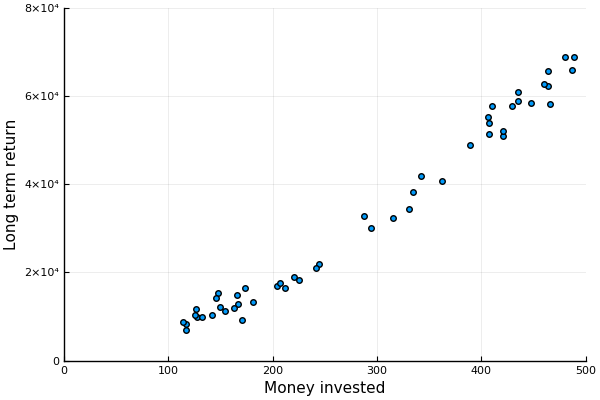

In [49]:
Random.seed!(0)
reality(x) = 250 + 30x + 0.8x^1.8 + 2000randn()
n = 50;
xVals = 100 .+ 400rand(n)
yVals = reality.(xVals);
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))

### Say we look at this data and decide to fit a curve of the form
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 =
\left[\begin{matrix}
1 & x & x^2 \end{matrix}\right]
\left[\begin{matrix}
\beta_0 \\ \beta_1 \\ \beta_2 \end{matrix}\right]
$$

We can now set the **design matrix**:

$$
A = 
\left[\begin{matrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2 \\
\end{matrix}\right]
$$

And seek a $\beta$ vector that minimizes $||A \beta - y||$.

In [50]:
A =[xVals[i]^j for i in 1:n, j in 0:2]

50×3 Array{Float64,2}:
 1.0  429.459  184435.0      
 1.0  464.143       2.15428e5
 1.0  165.826   27498.4      
 1.0  170.932   29217.6      
 1.0  211.552   44754.3      
 1.0  181.391   32902.6      
 1.0  116.921   13670.4      
 1.0  127.308   16207.3      
 1.0  244.731   59893.4      
 1.0  489.287       2.39401e5
 1.0  334.325  111773.0      
 1.0  315.716   99676.4      
 1.0  204.014   41621.9      
 ⋮                           
 1.0  293.864   86356.2      
 1.0  459.68        2.11305e5
 1.0  480.676       2.3105e5 
 1.0  420.447  176776.0      
 1.0  149.729   22418.8      
 1.0  145.708   21230.7      
 1.0  131.822   17377.0      
 1.0  410.67        1.6865e5 
 1.0  141.929   20143.9      
 1.0  435.23        1.89425e5
 1.0  173.646   30152.9      
 1.0  224.858   50561.1      

In [51]:
betaHat = pinv(A)*yVals

3-element Array{Float64,1}:
 891.2255677017974   
  41.94486462276796  
   0.2014071166238851

In [52]:
betaHat = A \ yVals

3-element Array{Float64,1}:
 891.2255677022918    
  41.94486462276237   
   0.20140711662388516

In [53]:
yHat(x) = betaHat'*[1,x,x^2]

yHat (generic function with 1 method)

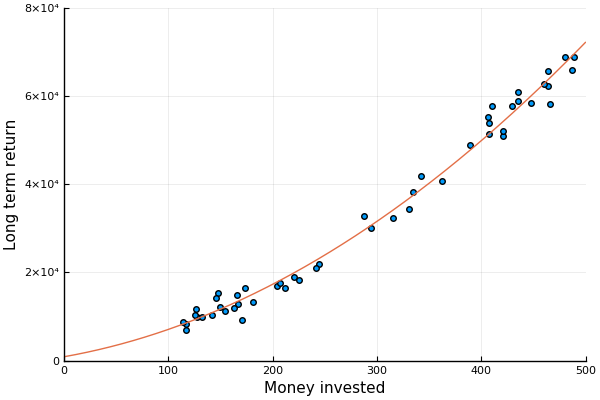

In [54]:
xGrid = 0:500
yEst = yHat.(xGrid);
plot!(xGrid,yEst)

### What about a different model...

In [55]:
A =[xVals[i]^j for i in 1:n, j in 0:4];
betaHat = pinv(A)*yVals

5-element Array{Float64,1}:
 569.9674662378493     
 107.79862919485993    
  -0.5453038951306075  
   0.002571194871979982
  -2.732196407643429e-6

In [56]:
yHat(x) = betaHat'*[1,x,x^2,x^3,x^4]

yHat (generic function with 1 method)

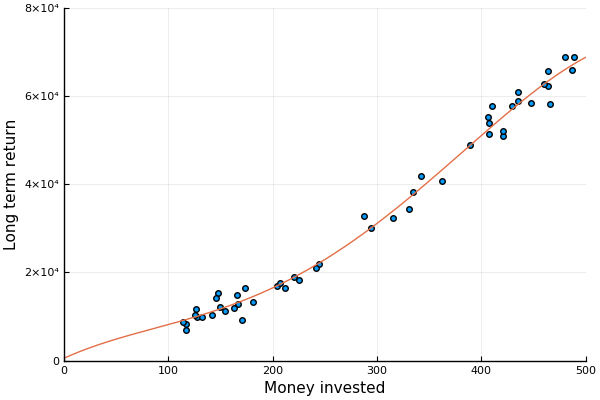

In [57]:
xGrid = 0:500
yEst = yHat.(xGrid);
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!(xGrid,yEst)

### Getting a complex model...

In [58]:
powers = 0:0.1:3
A =[xVals[i]^p for i in 1:n, p in powers];
betaHat = pinv(A)*yVals

31-element Array{Float64,1}:
       1.4794231724950373e7
       1.5035114691341102e7
       1.4631077774346262e7
       1.3287968815747976e7
       1.0960290111683741e7
       7.672479822751664e6 
       3.610910037060839e6 
 -841992.2900344953        
      -5.106099906086788e6 
      -8.455684959282205e6 
      -1.014312818228975e7 
      -9.597524065667778e6 
      -6.672393640597768e6 
       ⋮                   
      -6.006055603000715e6 
      -8.379400639894038e6 
      -4.486097589328948e6 
       3.4657726184003353e6
       8.176590542220831e6 
       3.1362095092576863e6
      -6.869136597689778e6 
      -5.029653917860217e6 
       9.071270217161536e6 
      -4.440200719956398e6 
  943134.7390007526        
  -74512.00425352901       

In [59]:
yHat(x) = betaHat'*[x^p for p in powers]

yHat (generic function with 1 method)

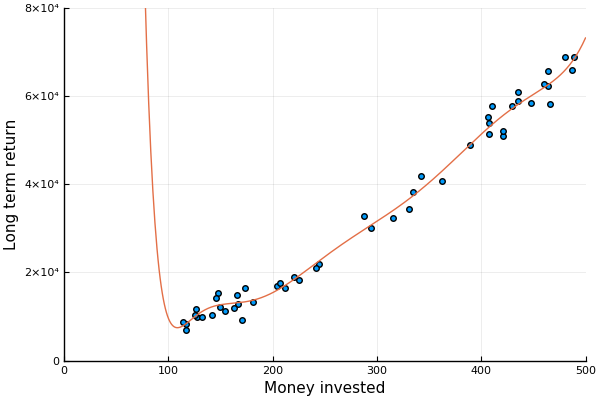

In [60]:
xGrid = 0:500
yEst = yHat.(xGrid);
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!(xGrid,yEst)

### Staying with the complex model, but regularizing

In [61]:
ridgeBeta(λ) = inv(A'*A + λ*I)*A'*yVals
λGrid = 0:20:2000
betaEsts = ridgeBeta.(λGrid);
norm.(betaEsts)

101-element Array{Float64,1}:
   1.0694452386288696e10
 251.75550435588863     
 169.01437722414056     
 128.10957721247175     
 101.919108748591       
  85.79294572570862     
  74.11582088144348     
  65.33102525454333     
  57.72364186699926     
  52.26500705424        
  47.79823652636996     
  44.282063126446175    
  40.97020791935847     
   ⋮                    
  11.403819172830644    
  11.36500714008561     
  11.326548422847537    
  11.286996279038512    
  11.249971637359934    
  11.216782244412785    
  11.18416587755945     
  11.154202748377083    
  11.11454583424618     
  11.08610907348081     
  11.052163789391926    
  11.022876528797354    

In [62]:
betaHat = ridgeBeta(2000.0)

31-element Array{Float64,1}:
 -0.034071245886825065
 -0.04619585373369618 
 -0.06178550403882023 
 -0.08134410109439166 
 -0.10512031614919937 
 -0.13284925208204593 
 -0.1633392271726899  
 -0.19389104141283137 
 -0.21953751775545027 
 -0.23211122582336996 
 -0.2192658084076018  
 -0.16367897484238503 
 -0.0429160080441795  
  ⋮                   
  3.4816676314254487  
  3.5779442997922253  
  2.9796468950077397  
  1.5119682693645073  
 -0.6836116196021473  
 -2.899536366375301   
 -3.7836988854436138  
 -1.8763278558142238  
  2.5059923033244544  
  4.381060890888103   
 -3.8411568758693004  
  0.7799925785459643  

In [63]:
yHat(x) = betaHat'*[x^p for p in powers]

yHat (generic function with 1 method)

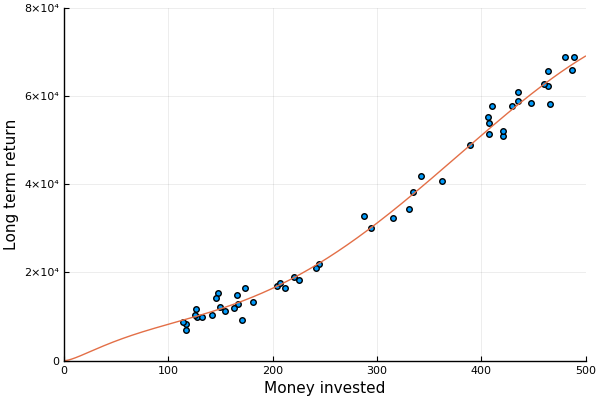

In [64]:
xGrid = 0:500
yEst = yHat.(xGrid);
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!(xGrid,yEst)

#### In practice you may choose the "best" $\lambda$ using cross-validation. We omit the details in this presentation.

#### A more advanced method is LASSO or Elastic Nets, where some variables are "knocked off" fully. We also omit the details.

# Classification

In [65]:
using Flux.Data.MNIST

images = MNIST.images(:train)
labels = MNIST.labels(:train)

train3 = images[labels .== 3]
train8 = images[labels .== 8]

length(train3),length(train8)

(6131, 5851)

In [66]:
train3[54]

In [67]:
train8[98]

### Also keep the test images

In [68]:
images = MNIST.images(:test)
labels = MNIST.labels(:test)

test3 = images[labels .== 3]
test8 = images[labels .== 8]

length(test3),length(test8)

(1010, 974)

In [69]:
length(train3),length(train8)

(6131, 5851)

In [70]:
yVals = [fill(-1,length(train3)) ; fill(+1,length(train8))]

11982-element Array{Int64,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1

In [71]:
n = length(train3) + length(train8)

11982

In [72]:
A = vcat(
    vcat([hcat(float.(t3)...) for t3 in train3]...),
    vcat([hcat(float.(t8)...) for t8 in train8]...)  )
A = [ones(n) A]

11982×785 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

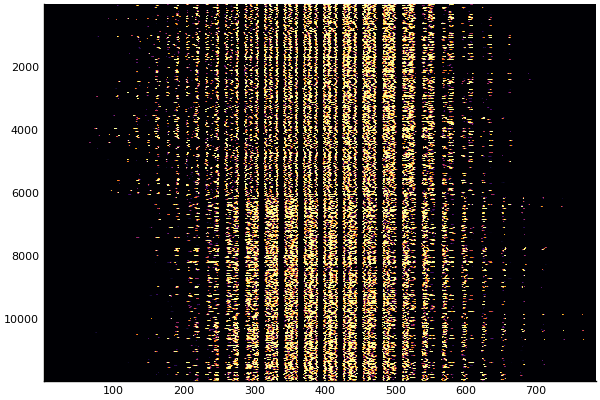

In [73]:
heatmap(A,yflip = true, legend = false)

In [74]:
@time begin
    betaHat = A \ yVals
end

  2.780118 seconds (4.97 k allocations: 79.289 MiB, 0.46% gc time)


785-element Array{Float64,1}:
 -0.29874328285239965
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  ⋮                  
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                

In [75]:
sort(betaHat)

785-element Array{Float64,1}:
 -447.77470256684035  
  -91.83906252131727  
  -20.93420668900583  
  -20.12281731295012  
  -12.970096219801018 
   -8.585745051595348 
   -7.5718682955670324
   -4.522049842472704 
   -3.7097037552105765
   -3.182659459842445 
   -3.166098424169005 
   -1.8570910582374687
   -1.8022722589018405
    ⋮                 
    4.658930086917823 
    5.1630948218363635
    5.853308051783189 
    6.170218028440353 
    6.922854776188601 
    6.956089738575784 
    8.054060105724242 
   12.39920003810355  
   20.872658410985984 
   30.893504367594304 
   37.68300377010177  
  415.66111581860565  

In [76]:
decide(img) = betaHat'*[1 ; vcat(float.(img)...)] > 0 ? 8 : 3

decide (generic function with 1 method)

### Let's try it out...

In [77]:
decide(test8[1]), 
decide(test3[1]), #makes a mistake...
decide(test3[2])

(8, 8, 3)

In [78]:
truePositive8 = sum(decide.(test8) .== 8)
truePositive3 = sum(decide.(test3) .== 3)

falsePositive3 = sum(decide.(test8) .== 3)
falsePositive8 = sum(decide.(test3) .== 8);

In [79]:
decisionMat = [truePositive3  falsePositive8; falsePositive3 truePositive8 ]

2×2 Array{Int64,2}:
 968   42
  40  934

In [80]:
nn = [length(test3),length(test8)]

2-element Array{Int64,1}:
 1010
  974

In [81]:
decisionMat ./ nn

2×2 Array{Float64,2}:
 0.958416   0.0415842
 0.0410678  0.958932 

We see that we achive about 95% accuracy! The next step is to consider multi-class classification (deciding between the digits '0'--'9')... see for example the "Statistics with Julia" book by Hayden Klok and Yoni Nazarathy.

## Thank You